In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_gc = 'GCNetwork.txt'
path_gnomad = "gnomad.v2.1.1.all_lofs.txt.bgz"

In [3]:
gnomad = pd.read_csv(path_gnomad, compression='gzip', on_bad_lines='skip', delim_whitespace=True, low_memory=False)
gc = pd.read_csv(path_gc, skiprows = [i for i in range (1,75)], delim_whitespace=True)
gnomad.rename(columns = {'pos':'Variant'}, inplace = True)

- CFTR
- Uma variante pode afetar mais de um transcritos, registrar quantos são afetados por cada consequencia
- registrar quantas variantes por cada consequencia

In [4]:
gnomad

,chrom,Variant,ref,alt,most_severe_consequence,gene_ids,gene_symbols,transcript_ids
0,1,69456,C,CCTACA,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
1,1,69469,ACAATT,A,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
2,1,69516,G,A,stop_gained,ENSG00000186092,OR4F5,ENST00000335137
3,1,69620,TA,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
4,1,69702,TG,T,frameshift_variant,ENSG00000186092,OR4F5,ENST00000335137
...,...,...,...,...,...,...,...,...
443764,Y,22921918,C,G,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443765,Y,22930689,A,G,splice_acceptor_variant,ENSG00000157828,RPS4Y2,ENST00000288666
443766,Y,22930763,C,T,stop_gained,ENSG00000157828,RPS4Y2,ENST00000288666
443767,Y,25375763,CA,C,frameshift_variant,ENSG00000205944,DAZ2,"ENST00000382440,ENST00000382433,ENST0000038229..."


In [5]:
##variantes e transcritos sem distinção de consequencia.
#substituindo as consequencias por numeros
all = gnomad[(gnomad['gene_symbols'] == 'CFTR')].drop(['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols'], axis=1)
all = all.replace(['frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant'], ['1','2','3','4'])

all

novas_linhas = []

for tupla in all.itertuples():
    nova_linha = []
    variante = tupla[1]
    consequencia = tupla[2]
    transcritos = tupla[3].split(",")
    for transcrito in transcritos:
        novas_linhas.append([variante, transcrito, int(consequencia)]) # transforme o consequência em inteiro!
    
df2 = pd.DataFrame(novas_linhas, columns=["Variante", "Transcrito", "Consequencia"])

df3 = df2.pivot_table(index = "Variante", columns="Transcrito", 
                      values="Consequencia", fill_value=0).T
df3.to_csv("Consequences.csv")

In [6]:
df3


Variante,117120152,117120190,117120202,117144332,117144404,117149101,117149146,117149150,117149156,117149181,...,117292905,117292924,117304740,117304832,117304889,117305519,117305610,117305619,117307003,117307015
Transcrito,,,,,,,,,,,,,,,,,,,,,
ENST00000003084,2,1,3,2,1,2,2,1,1,1,...,1,1,4,2,2,2,2,3,1,1
ENST00000426809,2,1,3,2,1,2,2,1,1,1,...,1,1,4,2,2,2,2,3,1,1
ENST00000446805,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ENST00000454343,2,1,3,2,1,2,2,1,1,1,...,1,1,4,2,2,2,2,3,1,1
ENST00000468795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000600166,0,0,0,0,0,0,0,0,0,0,...,1,1,4,2,2,2,0,3,0,0


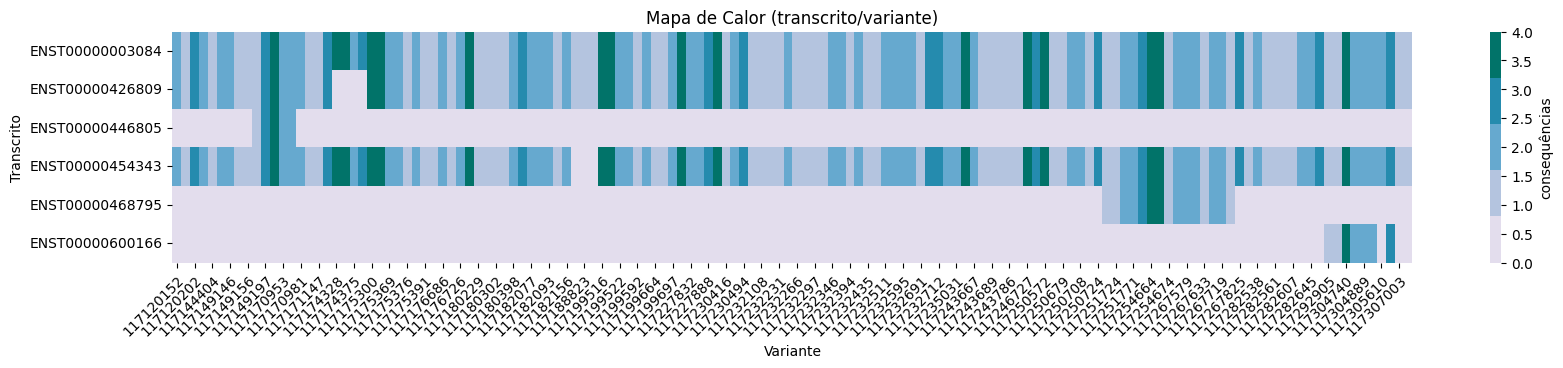

In [7]:
fig, ax = plt.subplots(figsize=(20, 3))
cmap = sns.color_palette("PuBuGn", 5)
sns.heatmap(df3, vmin=0, vmax = 4, cmap = cmap, cbar_kws={'label': 'consequências'})
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Mapa de Calor (transcrito/variante)")

"""setss = [0,1,2,3,4]
setss2 = ['','frameshift_variant','stop_gained','splice_donor_variant','splice_acceptor_variant']
colorbar = ax.collections[0].colorbar
ax.set_ticks(setss)
colorbar.set_ticklabels(['0','1','2','3','4'])
"""

plt.show()

In [9]:
metrica = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard',
           'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
           'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']
#Distance metric to use for the data

metodo = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward'] #Linkage method to use for calculating clusters

In [26]:
lista_para_dropar = ['chrom', 'ref', 'alt', 'gene_ids',  'gene_symbols']
list_of_msc = ['frameshift_variant', 'stop_gained', 'splice_acceptor_variant', 'splice_donor_variant']
list_of_list = ['frame_transc', 'stop_transc', 'splice_transc', 'donor_transc']
for i in range(len(list_of_msc)):
   list_of_list[i] = list((gnomad[(gnomad['gene_symbols'] == 'CFTR') & (gnomad['most_severe_consequence'] == list_of_msc[i])].drop(lista_para_dropar, axis=1).values.T)) 


In [27]:
#padding das variantes para poder criar o dataframe
new_v_sg = np.pad(stop_transc[0],(0, 6))
new_v_splice = np.pad(splice_transc[0],(0,40))
new_v_donor = np.pad(donor_transc[0],(0,41))

In [28]:
##criando DataFrame das variantes por conseq
data = np.array([frame_transc[0], new_v_sg, new_v_splice, new_v_donor])
column_name = ('frameshift variant', 'stop gained variant',  'splice acceptor variant', 'splice donor variant')
tabela = pd.DataFrame(data.T, columns = column_name)
tabela = tabela.replace(0,' ') #substituindo os zeros por vazio

l = [len(frame_transc[0]), len(stop_transc[0]), len(splice_transc[0]), len(donor_transc[0])]

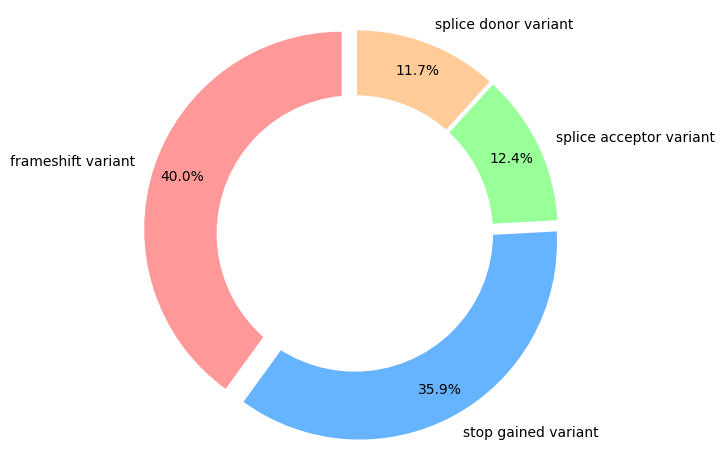

In [29]:
##gráfico de pizza para visualizar as quantidades (em porcentagem) das variantes por consequência
labels = column_name
sizes = l
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

#explsion
explode = (0.07,0.05,0.03,0.03)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

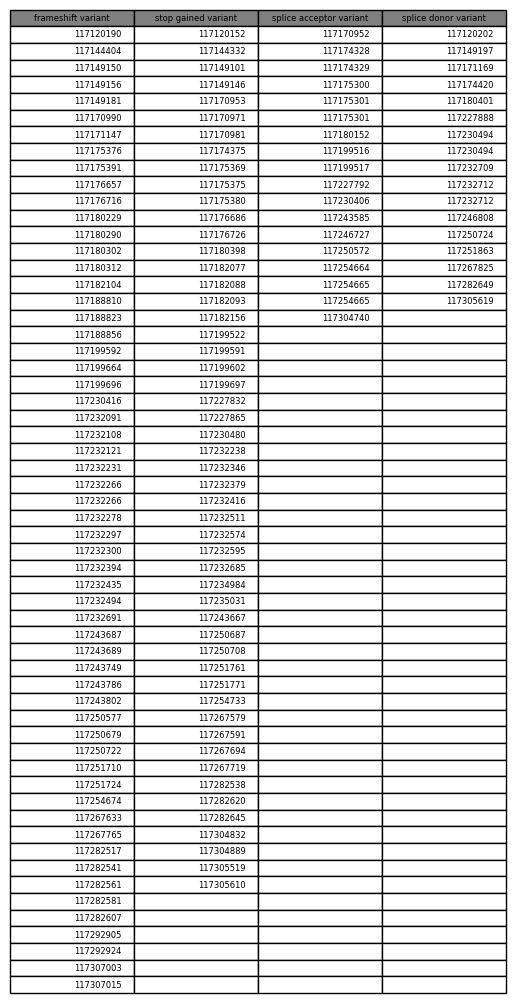

In [30]:
##tabela de variantes por consequência
fig, ax =plt.subplots(1,1)
ax.table(cellText=tabela.values,
        colLabels=tabela.columns,
        colColours =["gray"] * 4,
        loc="center")
ax.axis("off")
plt.savefig('variantes_por_conseq.pdf')
plt.show()